nl, nr 502 502
0.02
86.5 0


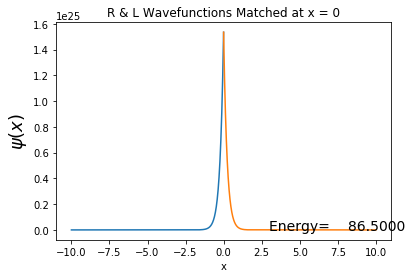

83.75 1


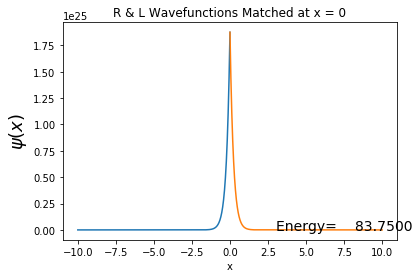

82.375 2


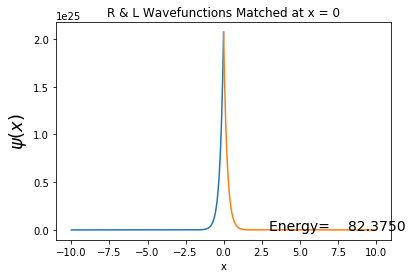

81.6875 3


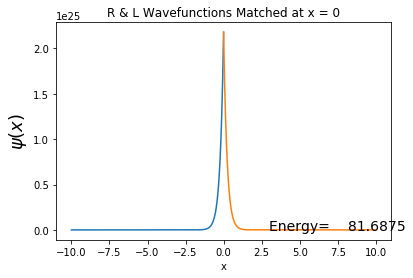

81.34375 4


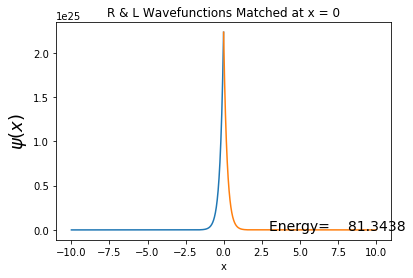

81.171875 5


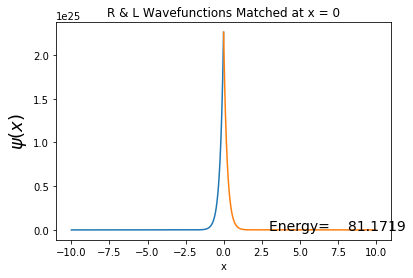

81.0859375 6


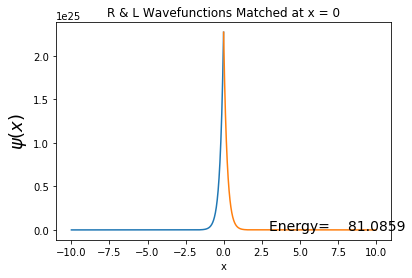

81.04296875 7


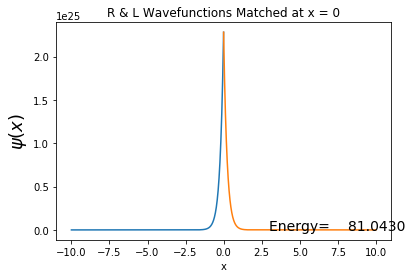

81.021484375 8


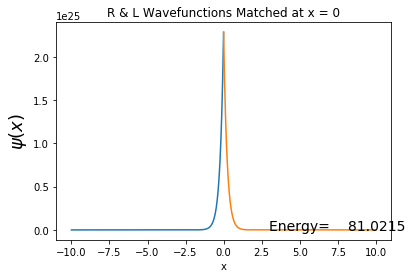

81.0107421875 9


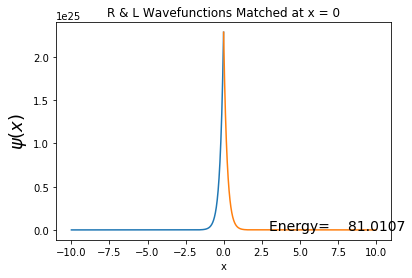

81.00537109375 10


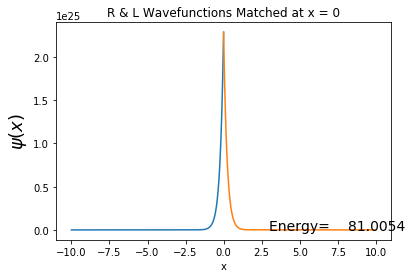

81.002685546875 11


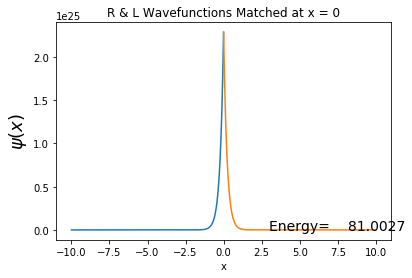

81.0013427734375 12


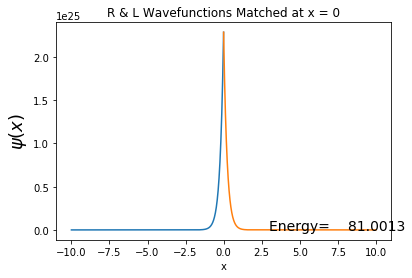

81.00067138671875 13


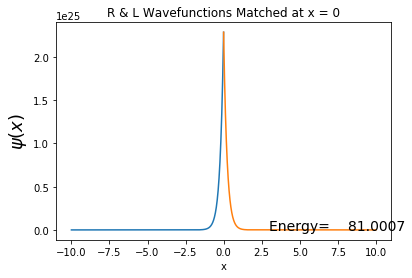

81.00033569335938 14


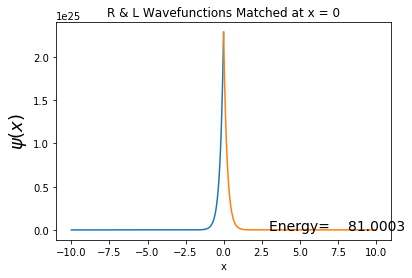

81.00016784667969 15


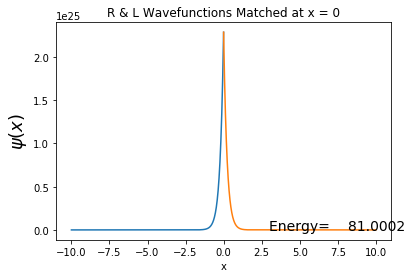

KeyboardInterrupt: 

In [9]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased)
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2017. 
    Please respect copyright & acknowledge our work."""

# QuantumNumerov.py: quantum bound state via Numerov algorithm
# General method, but here for HO V(x)= 9.4*x*x/2
# hbarc* omega=hbarc*sqrt(k/m)=19.733,  r mc**2=940 MeV, k=9.4
# E =(N+1/2)hbarc*omega = (N+1/2)19.733, N even, change N odd 

from numpy import *
import numpy as np, matplotlib.pyplot as plt

n = 1000; m = 2;  imax = 100;  Xleft0 = -20; Xright0 = 20
h  = 0.02; amin= 81.; amax = 92.;  e = amin;  de  = 0.01
eps=  1e-4; im = 500; nl = im + 2;  nr = n - im + 2
xmax = 5.0                    
print("nl, nr",nl, nr)
print(h)

xLeft = arange(-10,0.02,0.02); xRight = arange(10,0.02,-0.02)
xp = arange(-10,10,0.02)         # Bisection interval
uL =  zeros((503),float);   uR =  zeros([503],float)
k2L = zeros([1000],float);  k2R = zeros([1000],float)       
uL[0] = 0; uL[1] =0.00001;  uR[0] = 0; uR[1] = 0.00001                  

def V(x):                    # Potential harmonic oscillator
    v = 4.7*x*x                  
    return v

def setk2(e):                # Sets k2L=(sqrt(e-V))^2 and k2R 
    for i in range(0,n):         
       xLeft = Xleft0 + i*h
       xr = Xright0 - i*h
       fact=0.04829  # 2 m*c**2/hbarc**2=2*940/(197.33)**2
       k2L[i] = fact*(e-V(xLeft))
       k2R[i] = fact*(e-V(xr))

def Numerov (n,h,k2,u,e):            
    setk2(e)
    b=(h**2)/12.0                                # L & R Psi
    for i in range(1,n):  
        u[i+1]=(2*u[i]*(1-5.*b*k2[i])-(1+b*k2[i-1])*u[i-1])/(1+b*k2[i+1])
 

def diff(e):
   Numerov(nl,h,k2L,uL,e)              # Left wf
   Numerov(nr,h,k2R,uR,e)              # Right wf
   f0 = (uR[nr-1]+uL[nl-1]-uR[nr-3]-uL[nl-3])/(h*uR[nr-2])
   return f0

istep = 0
x1 = arange(-10,.02,0.02);   x2 = arange(10,-0.02,-0.02)
fig = plt.figure()                        
ax = fig.add_subplot(111)
ax.grid()

while abs(diff(e)) > eps :       # Bisection algorithm
    e =(amin + amax)/2                
    print(e,istep)
    if diff(e)*diff(amax) > 0: amax = e  
    else: amin = e
    ax.clear()   
    plt.text(3,-200,'Energy= %10.4f'%(e),fontsize=14)
    plt.plot(x1,uL[:-2])
    plt.plot(x2,uR[:-2])
    plt.xlabel('x')
    plt.ylabel('$\psi(x) $',fontsize=18)
    plt.title('R & L Wavefunctions Matched at x = 0')
    istep = istep+1    
    plt.pause(0.8)  # Pause to delay figures
plt.show() 
